# Práctico 3 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

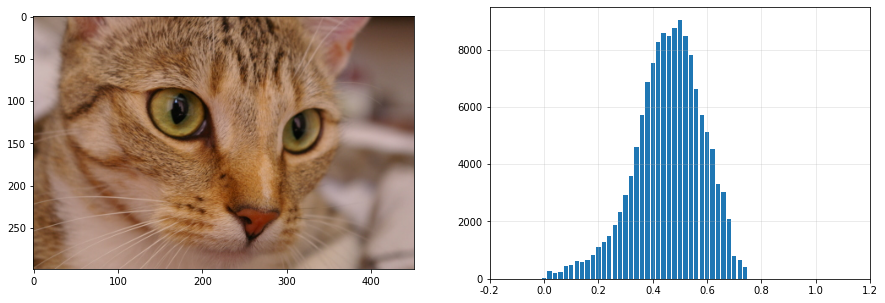

In [14]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

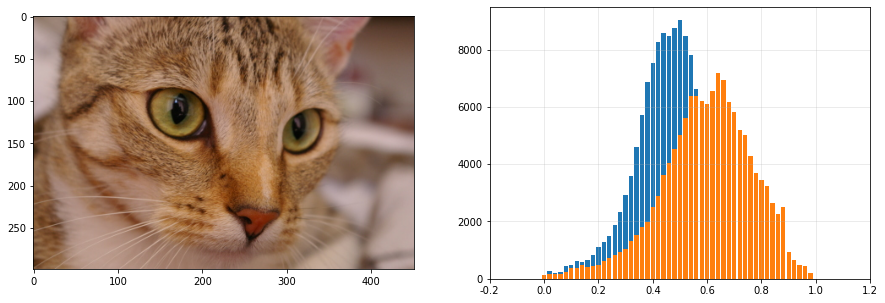

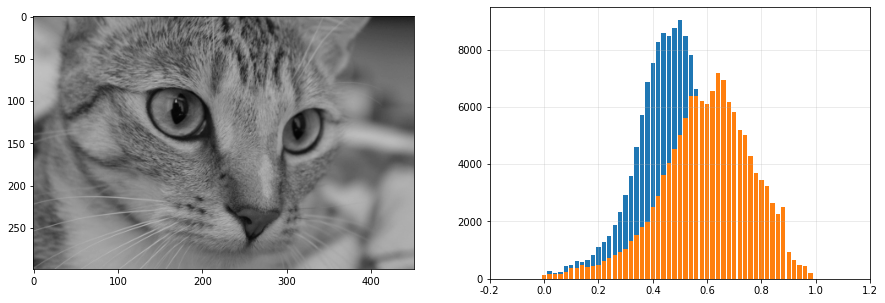

In [73]:
def norm_01(img):
    
    # si la imagen es rgb
    if img.ndim == 3:
        img_yiq = rgb2yiq(img)
        img_yiq[:,:,0] = (img_yiq[:,:,0] - img_yiq[:,:,0].min()) / (img_yiq[:,:,0].max() - img_yiq[:,:,0].min())
        
        return yiq2rgb(img_yiq)
    
    # si la imagen es gris
    else:
        img = (img - img.min()) / (img.max() - img.min())
        
        return img

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])
plot_hist(norm_01(img_rgb), 50, axes[1])
        
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
plot_hist(img_gray, 50, axes[1])
plot_hist(norm_01(img_gray), 50, axes[1])

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


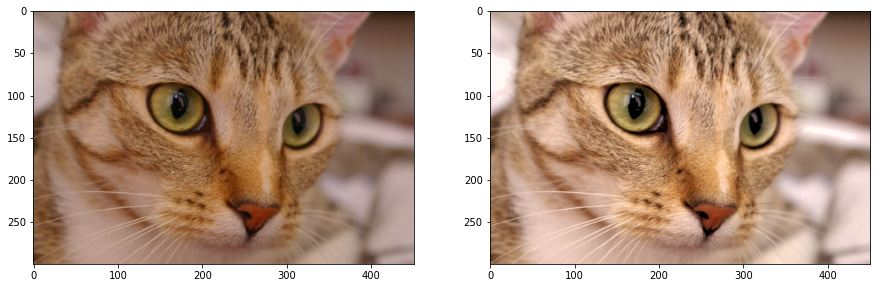

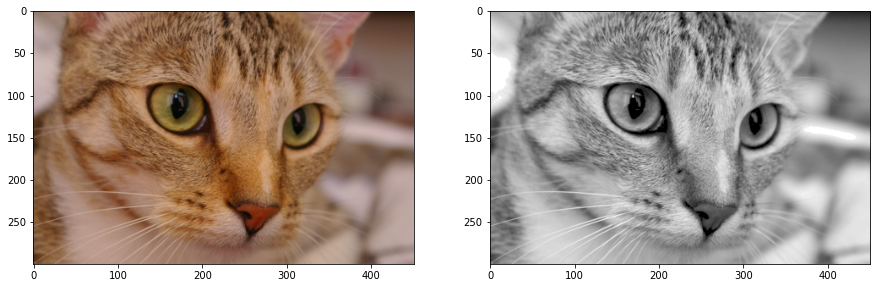

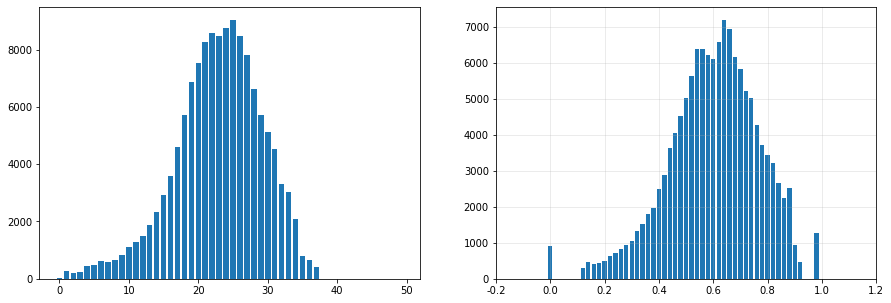

In [109]:
def norm_per(img, p):
    
    # si la imagen es rgb
    if img.ndim == 3:
        img_yiq = rgb2yiq(img)
        img_yiq[:,:,0] = (img_yiq[:,:,0] - img_yiq[:,:,0].min()) / (img_yiq[:,:,0].max() - img_yiq[:,:,0].min())
        img_yiq[:,:,0][img_yiq[:,:,0] < np.percentile(img_yiq[:,:,0], p)] = 0
        img_yiq[:,:,0][img_yiq[:,:,0] > np.percentile(img_yiq[:,:,0], 100-p)] = 1
        
        return yiq2rgb(img_yiq)
    
    # si la imagen es gris
    else:
        img = (img - img.min()) / (img.max() - img.min())
        img[img < np.percentile(img, p)] = 0
        img[img > np.percentile(img, 100-p)] = 1
        
        return img
    
per = 1
    
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
axes[1].imshow(norm_per(img_rgb, per), 'gray', vmin=0, vmax=1)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
axes[1].imshow(norm_per(img_gray, per), 'gray', vmin=0, vmax=1)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_hist(img_rgb, 50, axes[0])
plot_hist(norm_per(img_rgb, per), 50, axes[1])

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


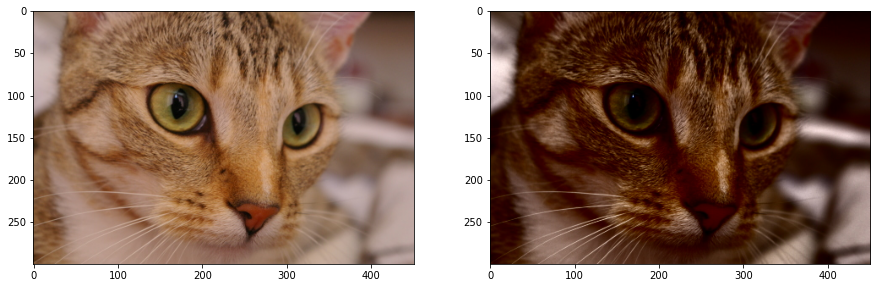

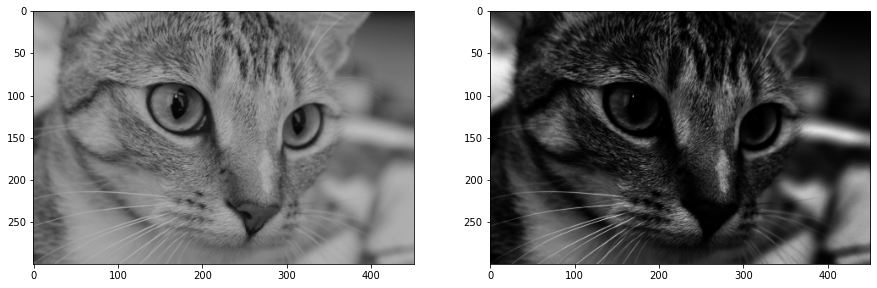

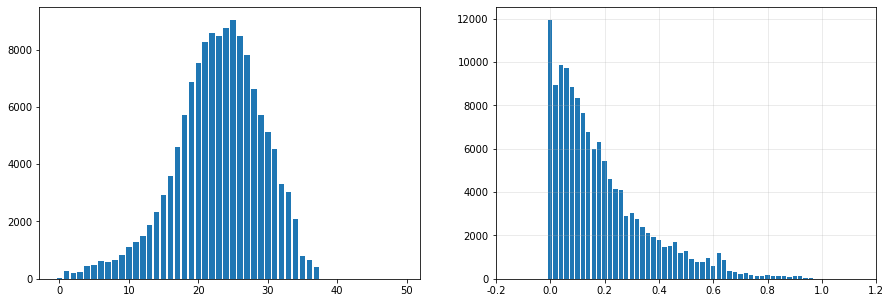

In [110]:
def gamma(img, alpha):
    
    g = 2**(-alpha)
    
    if img.ndim == 3:
        img_yiq = rgb2yiq(img)
        img_yiq[:,:,0] = img_yiq[:,:,0]**g
        
        return yiq2rgb(img_yiq)
        
    else:
        img = img**g
      
        return img
        
a = -2
        
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
axes[1].imshow(gamma(norm_01(img_rgb), a), 'gray', vmin=0, vmax=1)
        
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[1].imshow(gamma(norm_01(img_gray), a), 'gray', vmin=0, vmax=1)  

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_hist(img_rgb, 50, axes[0])
plot_hist(gamma(norm_01(img_rgb), a), 50, axes[1])


# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


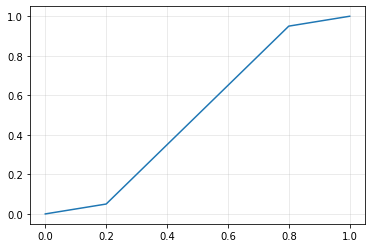

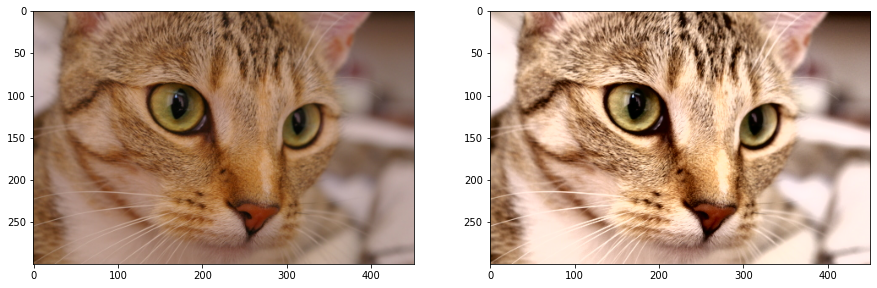

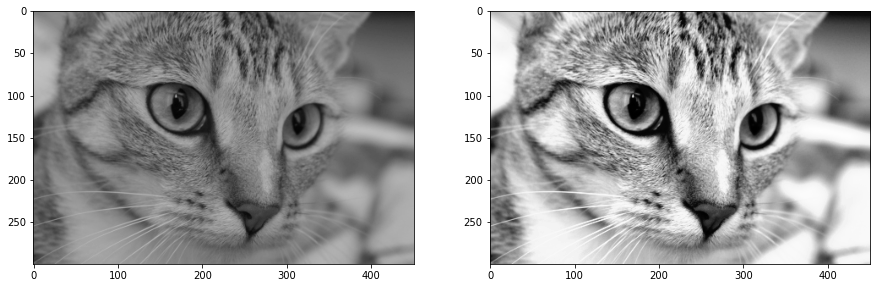

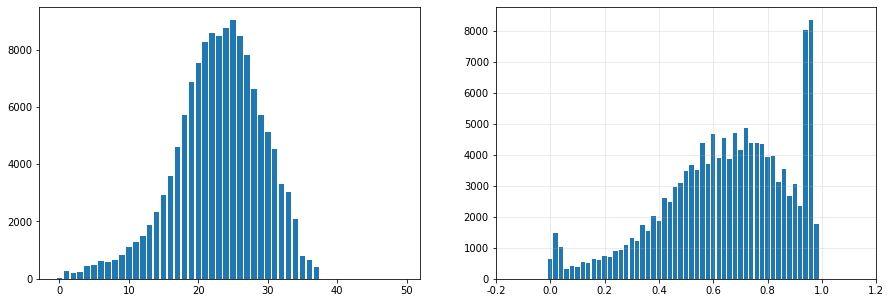

In [111]:
def func_tramos(img, x, y):
    
    if img.ndim == 3:
        img_yiq = rgb2yiq(img)
        img_yiq[:,:,0] = np.interp(img_yiq[:,:,0], x, y)
        
        return yiq2rgb(img_yiq)
        
    else:
        img = np.interp(img, x, y)
      
        return img

x = np.array([0, 0.2,  0.8,  1])
y = np.array([0, 0.05, 0.95, 1])

plt.plot(x, y)
plt.grid(alpha=0.3)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
axes[1].imshow(func_tramos(norm_01(img_rgb), x, y), 'gray', vmin=0, vmax=1)
        
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_gray, 'gray', vmin=0, vmax=1)
axes[1].imshow(func_tramos(norm_01(img_gray), x, y), 'gray', vmin=0, vmax=1)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_hist(img_rgb, 50, axes[0])
plot_hist(func_tramos(norm_01(img_rgb), x, y), 50, axes[1])

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

In [112]:
from scipy.stats import norm

norm.cdf(0.5)

0.6914624612740131